In [5]:
!pip install scikit-learn
import sklearn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
wine=datasets.load_wine()

In [8]:
#print(wine.DSCR)

#EDA

## EDA

In [9]:
df=pd.DataFrame(wine.data, columns=wine.feature_names)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [10]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [11]:
df["alcohol"]

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [12]:
df["label"]=wine.target
df.head(n=10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  label  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0  
5                          2.85   1450.0      0  
6                          3.58   1290.0      0  
7                          3.58   1295.0      0  
8                          2.85   1045.0      0  
9                          3.55   1045.0      0

In [13]:
df.tail(n=10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
168    13.58        2.58  2.69               24.5      105.0           1.55   
169    13.40        4.60  2.86               25.0      112.0           1.98   
170    12.20        3.03  2.32               19.0       96.0           1.25   
171    12.77        2.39  2.28               19.5       86.0           1.39   
172    14.16        2.51  2.48               20.0       91.0           1.68   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
168        0.84                  0.39             1.54         8.660000  0.74   
169        0.96                  0.27             1.11         8.500000  0.67   
170        0.49                  0.40             0.73         5.500000  0.66   
171        0.51                  0.48             0.64         9.899999  0.57   
172        0.70                  0.44             1.24         9.700000  0.62   
173        0.61                  0.52             1.06         7.700000  0.64   
174        0.75                  0.43             1.41         7.300000  0.70   
175        0.69                  0.43             1.35        10.200000  0.59   
176        0.68                  0.53             1.46         9.300000  0.60   
177        0.76                  0.56             1.35         9.200000  0.61   

     od280/od315_of_diluted_wines  proline  label  
168                          1.80    750.0      2  
169                          1.92    630.0      2  
170                          1.83    510.0      2  
171                          1.63    470.0      2  
172                          1.71    660.0      2  
173                          1.74    740.0      2  
174                          1.56    750.0      2  
175                          1.56    835.0      2  
176                          1.62    840.0      2  
177                          1.60    560.0      2

In [14]:
df["label"].value_counts()

label
1    71
0    59
2    48
Name: count, dtype: int64

In [15]:
df["label"].value_counts(normalize=True)

label
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

### check missing values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

<Axes: >

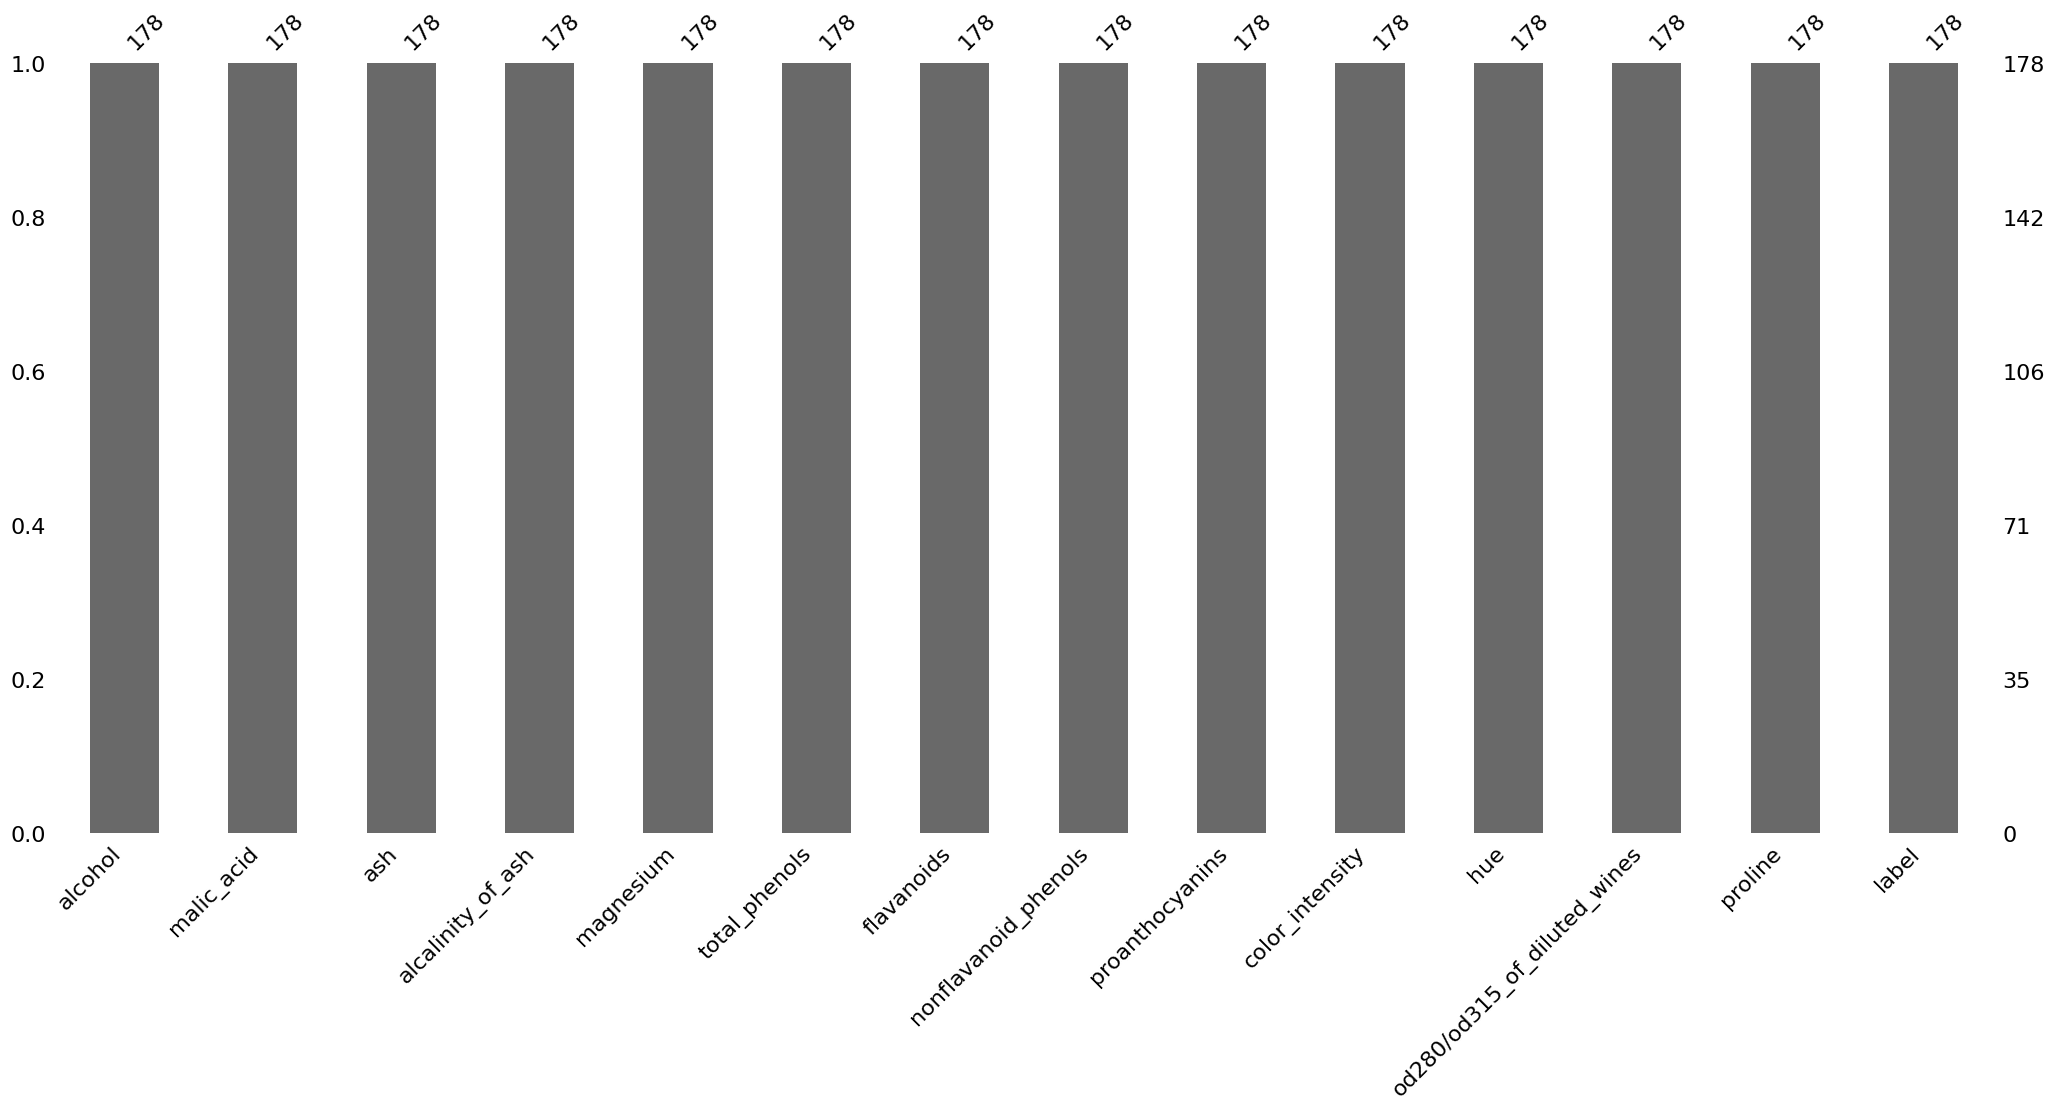

In [17]:
import missingno as msno
msno.bar(df)

In [18]:
!pip install missingno

### corelation

In [19]:
df.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
label                        -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
label                                  0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
label                          -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

In [20]:
corr=df.iloc[:,:-1].corr()
corr

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol

<Axes: >

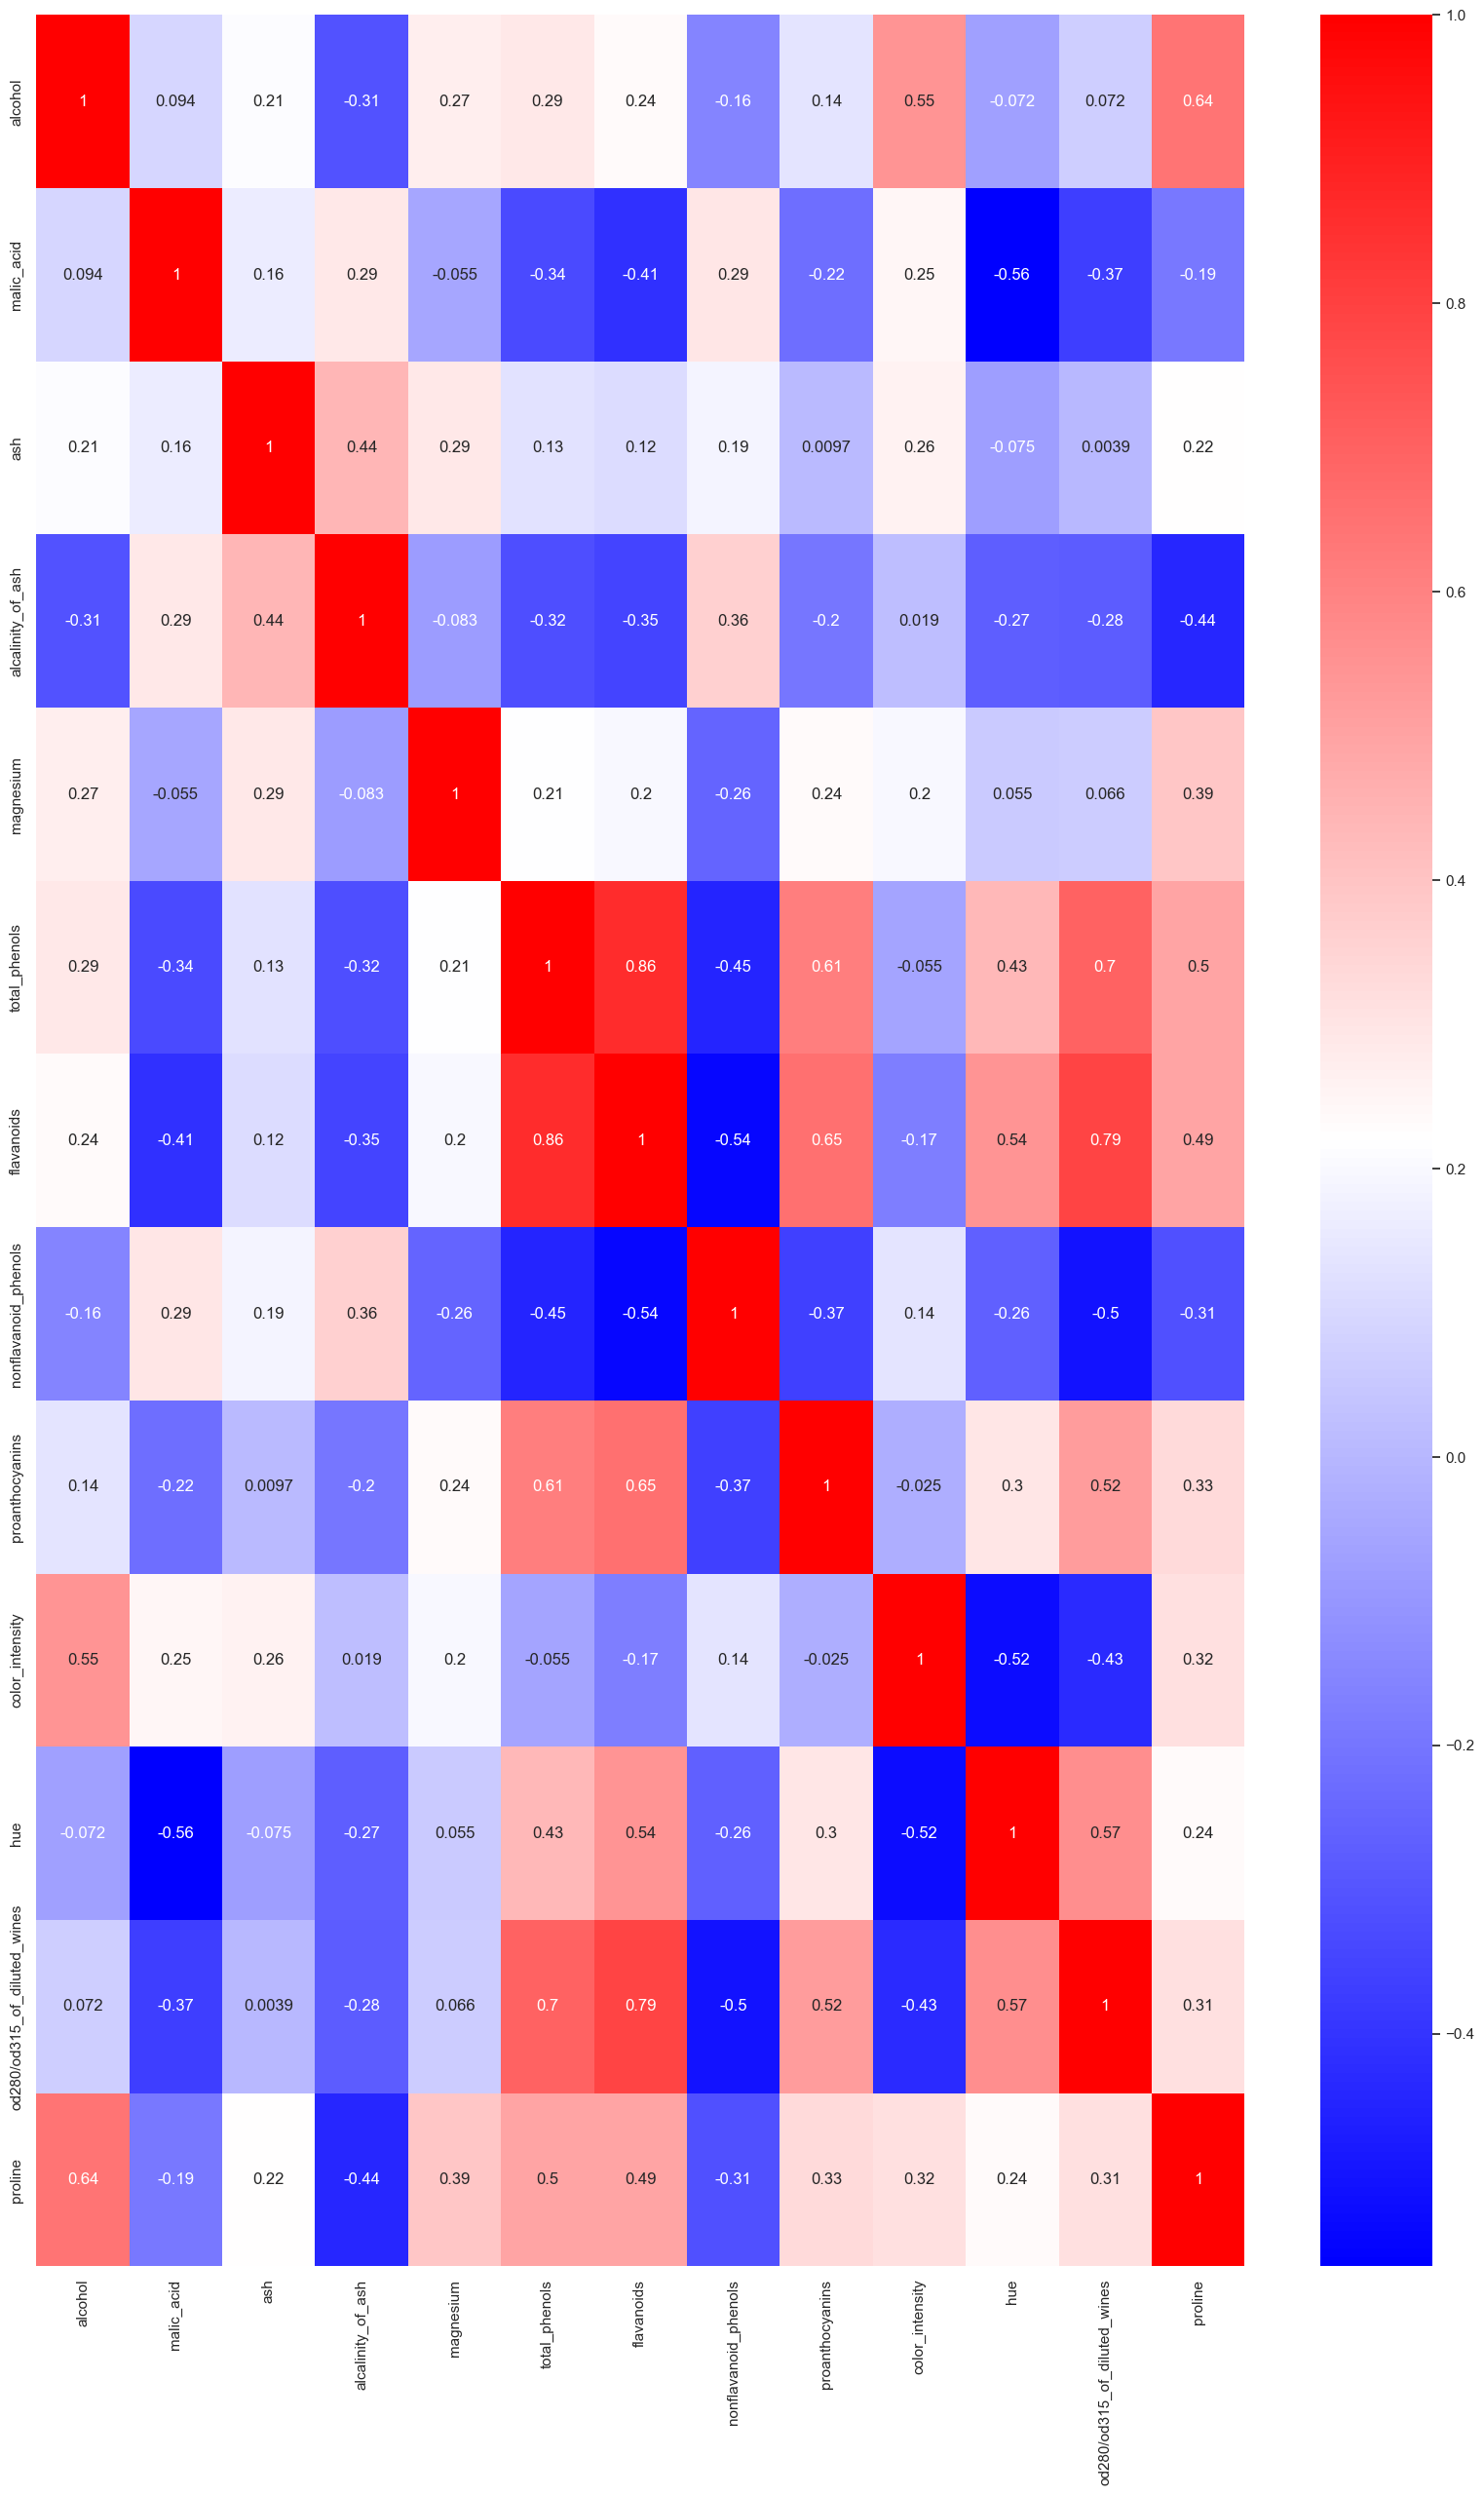

In [21]:
sn.set(rc={
    "figure.figsize":(20, 30)
})
    
sn.heatmap(corr, annot=True, cmap="bwr")

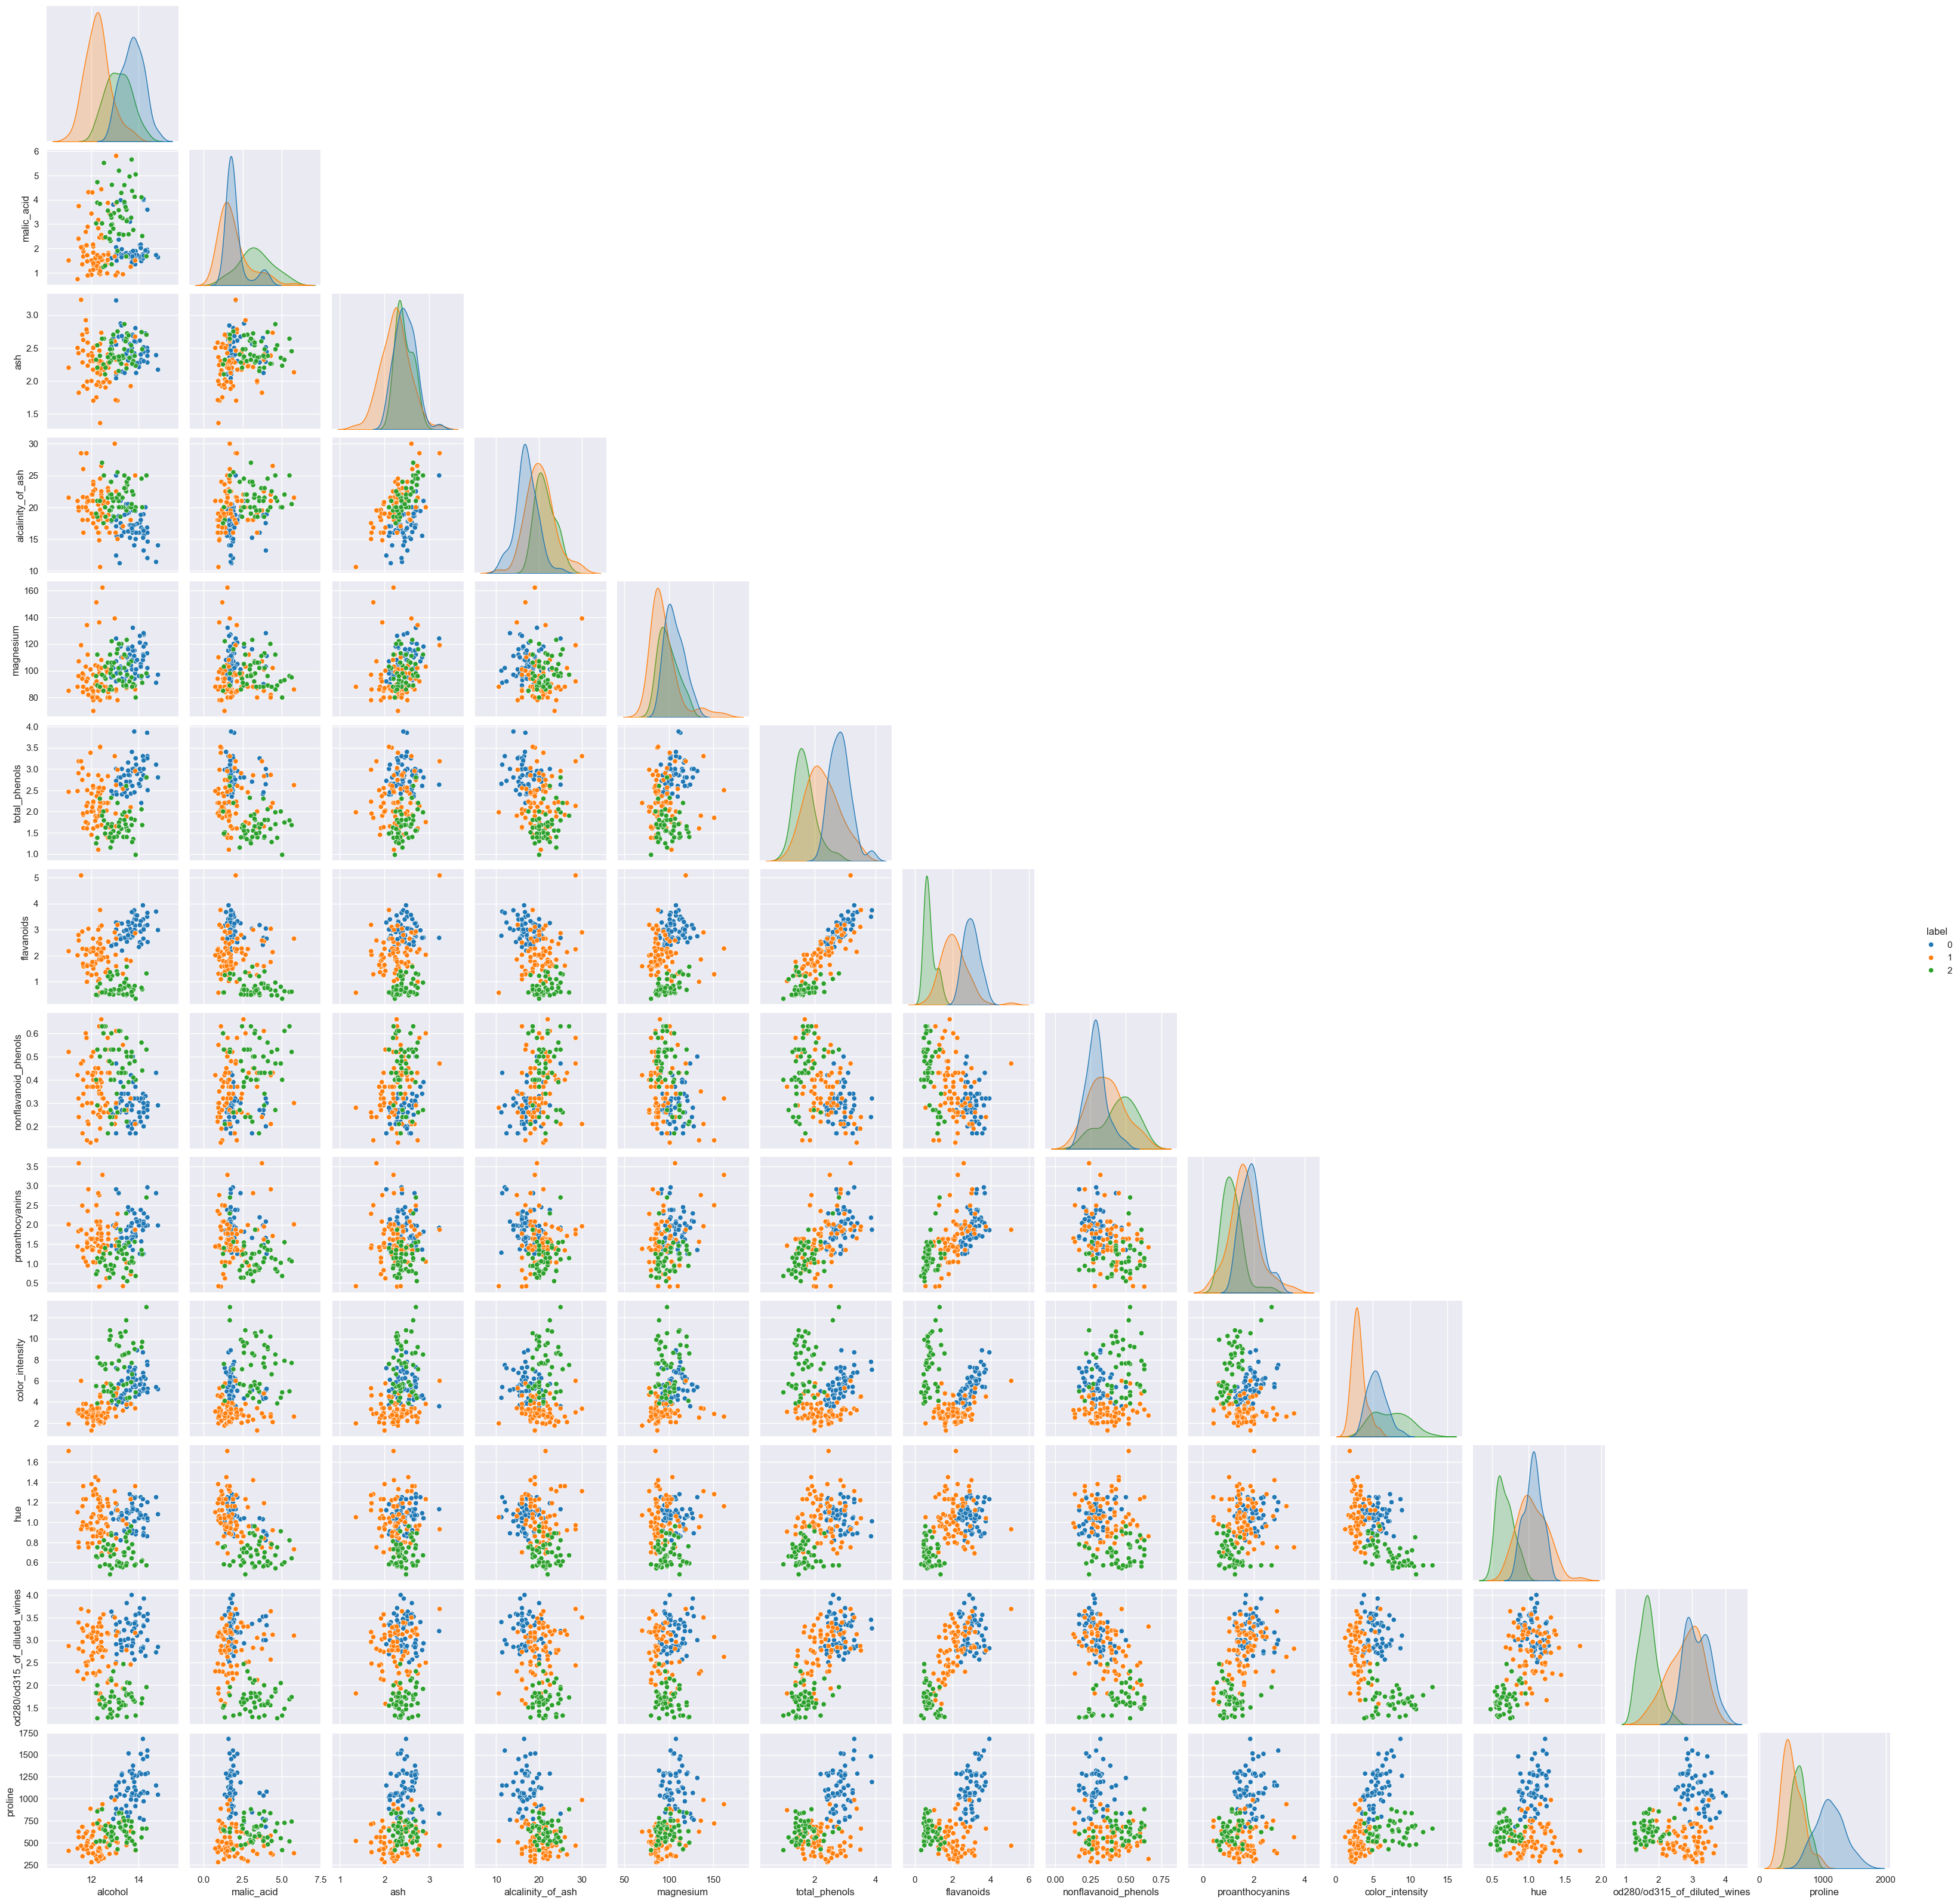

In [22]:
sn.pairplot(df, hue="label", palette="tab10", corner=True)

In [23]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
1%      11.440800    0.897700    1.700000          11.354000   78.000000   
5%      11.658500    1.061000    1.920000          14.770000   80.850000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
95%     14.221500    4.455500    2.741500          25.000000  124.300000   
99%     14.472800    5.542200    2.989000          28.500000  141.760000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
1%          1.138500    0.470000              0.140000         0.420000   
5%          1.380000    0.545500              0.190000         0.730000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
95%         3.274500    3.497500              0.600000         2.709000   
99%         3.595900    3.791400              0.630000         3.033600   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
1%            1.863200    0.547700                      1.290000   306.940000   
5%            2.114000    0.570000                      1.462500   354.550000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
95%           9.598000    1.284500                      3.580000  1297.250000   
99%          11.018500    1.426900                      3.843000  1522.360000   
max          13.000000    1.710000                      4.000000  1680.000000   

            label  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
1%       0.000000  
5%       0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
95%      2.000000  
99%      2.000000  
max      2.000000

In [24]:
minmax=preprocessing.MinMaxScaler()

In [25]:
X=df.drop("label", axis=1).values
Y=df["label"].values

In [26]:
X_sc=minmax.fit_transform(X)

In [27]:
df.describe().loc[["min", "max"]].T

min      max
alcohol                        11.03    14.83
malic_acid                      0.74     5.80
ash                             1.36     3.23
alcalinity_of_ash              10.60    30.00
magnesium                      70.00   162.00
total_phenols                   0.98     3.88
flavanoids                      0.34     5.08
nonflavanoid_phenols            0.13     0.66
proanthocyanins                 0.41     3.58
color_intensity                 1.28    13.00
hue                             0.48     1.71
od280/od315_of_diluted_wines    1.27     4.00
proline                       278.00  1680.00
label                           0.00     2.00

### decompositiom

In [28]:
pca=PCA()

In [29]:
pca.fit(X_sc)

PCA()

In [30]:
X_sc.shape

(178, 13)

In [31]:
pca_range=np.arange(1, X_sc.shape[1]+1)
pca_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

Text(0.5, 1.0, 'Principal Components & Variante')

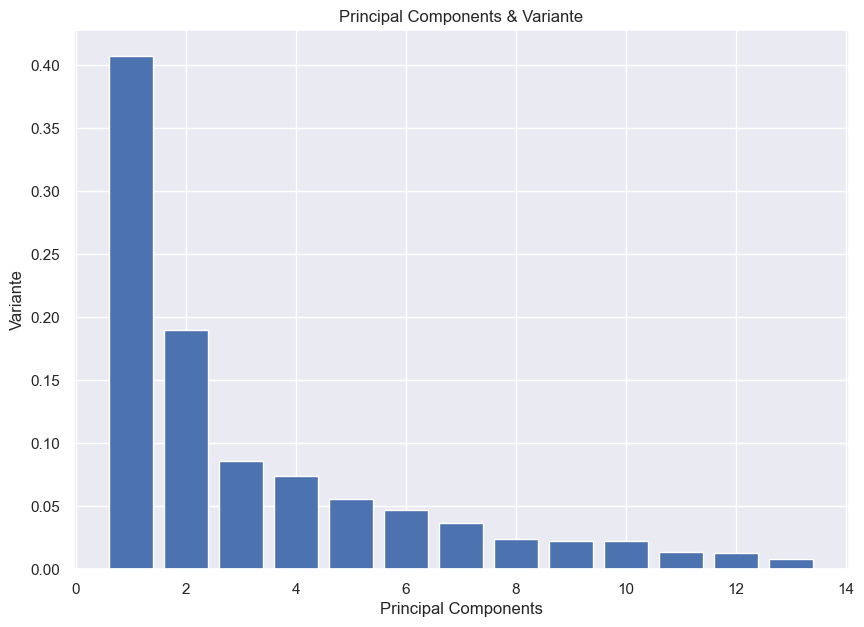

In [32]:
plt.figure(figsize=(10, 7))
plt.bar(pca_range, pca.explained_variance_ratio_)

plt.xlabel("Principal Components")
plt.ylabel("Variante")
plt.title("Principal Components & Variante")

### train test

In [33]:
X_train, x_test, y_train, y_test=split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [34]:
scaler = preprocessing.MinMaxScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
x_test=scaler.transform(x_test)

### train SVC

In [37]:
model=SVC()

In [38]:
model.fit(X_train, y_train)

SVC()

In [39]:
predictions=model.predict(x_test)

In [40]:
predictions

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [41]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [42]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [43]:
confusion_matrix(y_test, predictions)

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]])

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim 


In [45]:
torch.manual_seed(21)

In [46]:
torch.cuda.is_available()

False

In [47]:
device="cpu"

In [48]:
X_train.shape

(133, 13)

In [49]:
X_train = torch.tensor(X_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [50]:
model=nn.Sequential(
    nn.Linear(13, 3),
)

In [51]:
cryterial = nn.CrossEntropyLoss()

In [52]:
optimizer = optim.Adam(model.parameters(), lr=5)

In [53]:
epohs=20
B_s=32
for epoh in range(1,epohs+1):
    model.train()
    runing_los=0
    X_train = X_train[torch.randperm(X_train.shape[0])]
    for start in range(0, X_train.shape[0], B_s):
        x_b=X_train[start: start+B_s]
        y_b=y_train[start: start+B_s]
        optimizer.zero_grad() #градієнт
        preds=model(x_b)     
        los=cryterial(preds,y_b)
        los.backward()
        optimizer.step()
        print(epoh, start, los.item())
        

1 0 1.152069330215454
1 32 20.48455810546875
1 64 30.838287353515625
1 96 31.976160049438477
1 128 3.655531644821167
2 0 18.563169479370117
2 32 13.746437072753906
2 64 15.0848388671875
2 96 18.163286209106445
2 128 8.9057035446167
3 0 13.771049499511719
3 32 14.444478988647461
3 64 18.63933563232422
3 96 14.744781494140625
3 128 13.865757942199707
4 0 12.504889488220215
4 32 5.686126708984375
4 64 4.212060451507568
4 96 9.446216583251953
4 128 4.044655799865723
5 0 11.119708061218262
5 32 11.979865074157715
5 64 8.613364219665527
5 96 8.11556339263916
5 128 4.401149749755859
6 0 2.913663387298584
6 32 3.9630892276763916
6 64 6.168635845184326
6 96 6.217597007751465
6 128 1.8689947128295898
7 0 5.129940032958984
7 32 5.72932767868042
7 64 5.216762065887451
7 96 5.506644248962402
7 128 2.1906654834747314
8 0 7.264308929443359
8 32 5.541818618774414
8 64 8.90606689453125
8 96 6.413237571716309
8 128 2.4058260917663574
9 0 4.3370184898376465
9 32 6.870300769805908
9 64 6.889836311340332
9

In [54]:
#X_train.shape[0]

In [55]:
model.eval()

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
)

In [56]:
with torch.no_grad():
    preds=model(x_test)

In [57]:
preds.argmax(axis=1)

tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
print (classification_report(y_test, preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.43      1.00      0.60        18
           2       0.00      0.00      0.00        12

    accuracy                           0.42        45
   macro avg       0.25      0.36      0.24        45
weighted avg       0.28      0.42      0.28        45



C:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [59]:
confusion_matrix(y_test, preds.argmax(axis=1))

array([[ 1, 14,  0],
       [ 0, 18,  0],
       [ 2, 10,  0]])

In [60]:
print (classification_report(y_test, preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.43      1.00      0.60        18
           2       0.00      0.00      0.00        12

    accuracy                           0.42        45
   macro avg       0.25      0.36      0.24        45
weighted avg       0.28      0.42      0.28        45



C:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [61]:
torch.randperm(X_train.shape[0])

tensor([ 77, 120,  69,  56,   8, 110,  74, 132,  44, 125,  95,   4,  10, 130,
         85, 131, 108,  14,  42, 103, 121,  86, 127,  96,  79, 101,  27,  37,
         22,  88,  49,  43,  58,  36,  26,  19,   5,  84,  67,  48,  11,  66,
         32,   7,  53,  64,  99, 129,  16,  13,  57,  80,  60,  24,  34,  28,
         39,  82, 112,  41, 114,  17,  47,  68, 115,  25, 111,  65, 118,  83,
         73, 107,   2, 122, 105,  87,  12,  76, 116,  50,   6,  89,  23,  59,
         78,  29,  51, 124,  46,  61,  52,  35,  97,  18, 126,  75,   1,  55,
        113,  33,  31, 119, 117,   3,  91,  20,  30,   0, 104,  54,  40,  70,
          9,  38,  94,  93,  92,  62,  21,  90,  63,  15,  45,  81, 102, 106,
        128,  71, 123, 100,  72,  98, 109])

In [62]:
X_train[torch.randperm(X_train.shape[0])]

tensor([[0.5816, 0.3462, 0.8075,  ..., 0.4553, 0.6081, 0.3601],
        [0.3211, 0.7800, 0.6310,  ..., 0.2195, 0.0000, 0.3483],
        [0.5316, 0.6049, 0.5134,  ..., 0.2927, 0.2711, 0.1868],
        ...,
        [0.2079, 0.1690, 0.2781,  ..., 0.3740, 0.4286, 0.1080],
        [0.2000, 0.2525, 0.7594,  ..., 0.3984, 0.4286, 0.1481],
        [0.5316, 0.2363, 0.9947,  ..., 0.5285, 0.7070, 0.4350]])

In [63]:
X_train


tensor([[0.7079, 0.1100, 0.6096,  ..., 0.3333, 0.5861, 0.7935],
        [0.2658, 0.6945, 0.5455,  ..., 0.2520, 0.4762, 0.2380],
        [0.8079, 0.2587, 0.5027,  ..., 0.6260, 0.6960, 0.9708],
        ...,
        [0.7000, 0.4827, 0.6310,  ..., 0.3902, 0.2015, 0.3168],
        [0.5921, 0.1527, 0.7914,  ..., 0.4959, 0.5531, 0.4744],
        [0.3316, 0.4644, 0.4545,  ..., 0.7642, 0.5714, 0.1009]])